# WeatherPy
----

#### Note
* Instructions have been included for each segment. You do not have to follow them exactly, but they are included to help you think through the steps.

In [1]:
# Dependencies and Setup
import matplotlib.pyplot as plt
import pandas as pd
import numpy as np
import requests
import time
from scipy.stats import linregress

# Import API key
from api_keys import weather_api_key

# Incorporated citipy to determine city based on latitude and longitude
from citipy import citipy

# Output File (CSV)
output_data_file = "output_data/cities.csv"

# Range of latitudes and longitudes
lat_range = (-90, 90)
lng_range = (-180, 180)

## Generate Cities List

In [2]:
# List for holding lat_lngs and cities
lat_lngs = []
cities = []

# Create a set of random lat and lng combinations
lats = np.random.uniform(low=-90.000, high=90.000, size=1500)
lngs = np.random.uniform(low=-180.000, high=180.000, size=1500)
lat_lngs = zip(lats, lngs)

# Identify nearest city for each lat, lng combination
for lat_lng in lat_lngs:
    city = citipy.nearest_city(lat_lng[0], lat_lng[1]).city_name
    
    # If the city is unique, then add it to a our cities list
    if city not in cities:
        cities.append(city)

# Print the city count to confirm sufficient count
len(cities)

630

### Perform API Calls
* Perform a weather check on each city using a series of successive API calls.
* Include a print log of each city as it'sbeing processed (with the city number and city name).


In [74]:
mock=["monterrey","saltillo"]
arrayCit = []
count=1
print("Beginning Data Retrieval")
print("------------------------")
for city in cities:
    response=requests.get(f"http://api.openweathermap.org/data/2.5/weather?q={city}&appid={weather_api_key}")
    data=response.json()
    if(data["cod"]==200):
        celcisus_temp = data["main"]["temp_max"] - 273.15
        fahrenheit_temp = celcisus_temp * ( 9 / 5 ) + 32
        print(f"Processing Record {count} of {len(cities)} | {city}")
        #dataF={"City":city ,"Cloudiness": data["clouds"]["all"] , "Country":data["sys"]["country"] , "Date":data["dt"] , "Humidity":data["main"]["humidity"] , "Lat":data["coord"]["lat"] , "Lng":data["coord"]["lon"] , "MaxTemp":data["main"]["temp_max"] , "WindSpeed":data["wind"]["speed"]}
        dataV=(city,data["clouds"]["all"],data["sys"]["country"],data["dt"],data["main"]["humidity"] ,data["coord"]["lat"],data["coord"]["lon"],fahrenheit_temp,data["wind"]["speed"])
        arrayCit.append(dataV)
        count=count+1
    else:
        print(f"SKIP NOT FOUND CITY | {city}")
        count=count+1

Beginning Data Retrieval
------------------------
Processing Record 1 of 630 | mataura
Processing Record 2 of 630 | hobart
SKIP NOT FOUND CITY | azar shahr
Processing Record 4 of 630 | saryg-sep
Processing Record 5 of 630 | tadine
SKIP NOT FOUND CITY | palabuhanratu
Processing Record 7 of 630 | kodiak
Processing Record 8 of 630 | airai
Processing Record 9 of 630 | santiago de cuba
Processing Record 10 of 630 | rikitea
Processing Record 11 of 630 | yellowknife
Processing Record 12 of 630 | puerto escondido
Processing Record 13 of 630 | khatanga
Processing Record 14 of 630 | constitucion
Processing Record 15 of 630 | mount isa
Processing Record 16 of 630 | ambulu
Processing Record 17 of 630 | ribeira grande
Processing Record 18 of 630 | cherskiy
Processing Record 19 of 630 | nanortalik
Processing Record 20 of 630 | dikson
Processing Record 21 of 630 | cuajinicuilapa
Processing Record 22 of 630 | haines junction
Processing Record 23 of 630 | ushuaia
Processing Record 24 of 630 | bathsheba

Processing Record 211 of 630 | deer lake
Processing Record 212 of 630 | shimoda
Processing Record 213 of 630 | gorontalo
Processing Record 214 of 630 | perevolotskiy
SKIP NOT FOUND CITY | sorvag
Processing Record 216 of 630 | takhtamygda
SKIP NOT FOUND CITY | gangotri
Processing Record 218 of 630 | fairbanks
Processing Record 219 of 630 | akalkot
Processing Record 220 of 630 | hokitika
SKIP NOT FOUND CITY | illoqqortoormiut
Processing Record 222 of 630 | cam ranh
Processing Record 223 of 630 | thompson
Processing Record 224 of 630 | nacala
Processing Record 225 of 630 | south yuba city
Processing Record 226 of 630 | piqua
Processing Record 227 of 630 | ardabil
Processing Record 228 of 630 | ostrovnoy
Processing Record 229 of 630 | bambous virieux
Processing Record 230 of 630 | birjand
Processing Record 231 of 630 | namibe
Processing Record 232 of 630 | buchanan
Processing Record 233 of 630 | chuy
Processing Record 234 of 630 | faanui
SKIP NOT FOUND CITY | saleaula
Processing Record 236

Processing Record 421 of 630 | phan thiet
Processing Record 422 of 630 | svetlogorsk
Processing Record 423 of 630 | brookings
Processing Record 424 of 630 | shenjiamen
SKIP NOT FOUND CITY | bargal
Processing Record 426 of 630 | hit
Processing Record 427 of 630 | lompoc
Processing Record 428 of 630 | zapresic
Processing Record 429 of 630 | vao
Processing Record 430 of 630 | port blair
Processing Record 431 of 630 | morlaix
SKIP NOT FOUND CITY | temaraia
Processing Record 433 of 630 | sanming
Processing Record 434 of 630 | grand island
Processing Record 435 of 630 | yumen
Processing Record 436 of 630 | bollnas
Processing Record 437 of 630 | mitsamiouli
Processing Record 438 of 630 | gumdag
Processing Record 439 of 630 | salalah
Processing Record 440 of 630 | comarapa
Processing Record 441 of 630 | santa maria
Processing Record 442 of 630 | magistralnyy
Processing Record 443 of 630 | tambura
Processing Record 444 of 630 | talara
Processing Record 445 of 630 | ambon
Processing Record 446 o

SKIP NOT FOUND CITY | doctor pedro p. pena
Processing Record 627 of 630 | turayf
SKIP NOT FOUND CITY | hunza
Processing Record 629 of 630 | douentza
Processing Record 630 of 630 | karratha


### Convert Raw Data to DataFrame
* Export the city data into a .csv.
* Display the DataFrame

In [75]:
dfCities = pd.DataFrame(arrayCit, columns = ["City","Cloudiness","Country","Date","Humidity","Lat","Lng","Max Temp","WindSpeed"])
dfCities

,City,Cloudiness,Country,Date,Humidity,Lat,Lng,Max Temp,WindSpeed
0,mataura,100,NZ,1582751940,51,-46.19,168.86,71.006,2.24
1,hobart,75,AU,1582751940,50,-42.88,147.33,57.200,6.70
2,saryg-sep,4,RU,1582751940,95,51.50,95.60,-5.800,1.13
3,tadine,11,NC,1582751802,83,-21.55,167.88,79.484,4.29
4,kodiak,40,US,1582751940,74,57.79,-152.41,35.600,6.70
...,...,...,...,...,...,...,...,...,...
569,powell river,90,CA,1582752018,87,49.85,-124.54,48.002,2.60
570,linfen,100,CN,1582752018,72,36.09,111.52,44.798,2.28
571,turayf,0,SA,1582752019,93,31.67,38.66,46.400,3.10
572,douentza,0,ML,1582752019,13,15.00,-2.95,72.518,2.40


### Plotting the Data
* Use proper labeling of the plots using plot titles (including date of analysis) and axes labels.
* Save the plotted figures as .pngs.

#### Latitude vs. Temperature Plot

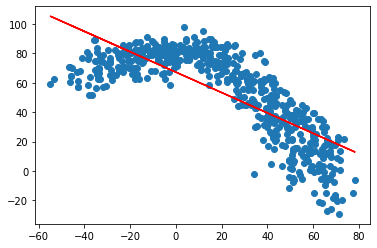

In [87]:
#plt.scatter(dfCities["Lat"], dfCities["Max Temp"])
x=dfCities["Lat"]
y=dfCities["Max Temp"]
(slope, intercept, rvalue, pvalue, stderr) = linregress(x, y)
regress_values = x * slope + intercept
line_eq = "y = " + str(round(slope,2)) + "x + " + str(round(intercept,2))
plt.scatter(x,y)
plt.plot(x,regress_values,"r-")

#### Latitude vs. Humidity Plot

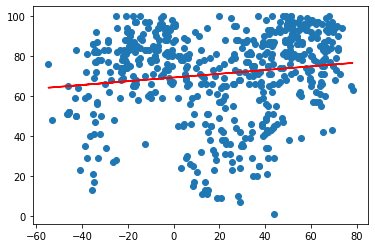

In [85]:
#plt.scatter(dfCities["Lat"], dfCities["Humidity"])
x=dfCities["Lat"]
y=dfCities["Humidity"]
(slope, intercept, rvalue, pvalue, stderr) = linregress(x, y)
regress_values = x * slope + intercept
line_eq = "y = " + str(round(slope,2)) + "x + " + str(round(intercept,2))
plt.scatter(x,y)
plt.plot(x,regress_values,"r-")

#### Latitude vs. Cloudiness Plot

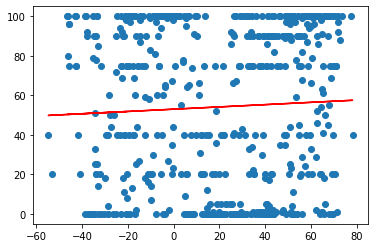

In [83]:
#plt.scatter(dfCities["Lat"], dfCities["Cloudiness"])
x=dfCities["Lat"]
y=dfCities["Cloudiness"]
(slope, intercept, rvalue, pvalue, stderr) = linregress(x, y)
regress_values = x * slope + intercept
line_eq = "y = " + str(round(slope,2)) + "x + " + str(round(intercept,2))
plt.scatter(x,y)
plt.plot(x,regress_values,"r-")

#### Latitude vs. Wind Speed Plot

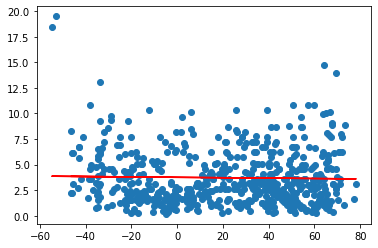

In [84]:
#plt.scatter(dfCities["Lat"], dfCities["WindSpeed"])
x=dfCities["Lat"]
y=dfCities["WindSpeed"]
(slope, intercept, rvalue, pvalue, stderr) = linregress(x, y)
regress_values = x * slope + intercept
line_eq = "y = " + str(round(slope,2)) + "x + " + str(round(intercept,2))
plt.scatter(x,y)
plt.plot(x,regress_values,"r-")

## Linear Regression

In [108]:
# OPTIONAL: Create a function to create Linear Regression plots


In [90]:
# Create Northern and Southern Hemisphere DataFrames
Southern=dfCities[dfCities["Lat"]<0]
Northern=dfCities[dfCities["Lat"]>=0]

,City,Cloudiness,Country,Date,Humidity,Lat,Lng,Max Temp,WindSpeed
2,saryg-sep,4,RU,1582751940,95,51.50,95.60,-5.800,1.13
4,kodiak,40,US,1582751940,74,57.79,-152.41,35.600,6.70
6,santiago de cuba,20,CU,1582751941,74,20.02,-75.82,84.200,3.10
8,yellowknife,90,CA,1582751708,77,62.46,-114.35,5.000,2.10
9,puerto escondido,5,MX,1582751941,79,15.85,-97.07,84.200,3.60
...,...,...,...,...,...,...,...,...,...
568,goderich,100,CA,1582752018,87,43.75,-81.72,28.004,2.24
569,powell river,90,CA,1582752018,87,49.85,-124.54,48.002,2.60
570,linfen,100,CN,1582752018,72,36.09,111.52,44.798,2.28
571,turayf,0,SA,1582752019,93,31.67,38.66,46.400,3.10


####  Northern Hemisphere - Max Temp vs. Latitude Linear Regression

The r-squared is: -1.35


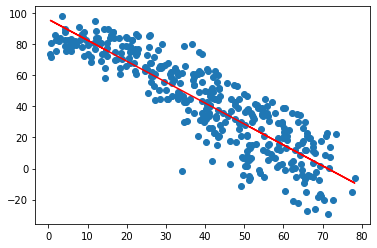

In [92]:
x=Northern["Lat"]
y=Northern["Max Temp"]
(slope, intercept, rvalue, pvalue, stderr) = linregress(x, y)
regress_values = x * slope + intercept
line_eq = "y = " + str(round(slope,2)) + "x + " + str(round(intercept,2))
print(f"The r-squared is: {str(round(slope,2))}")
plt.scatter(x,y)
plt.plot(x,regress_values,"r-")

####  Southern Hemisphere - Max Temp vs. Latitude Linear Regression

The r-squared is: 0.3


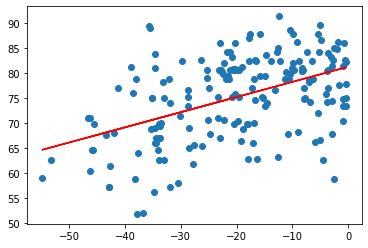

In [93]:
x=Southern["Lat"]
y=Southern["Max Temp"]
(slope, intercept, rvalue, pvalue, stderr) = linregress(x, y)
regress_values = x * slope + intercept
line_eq = "y = " + str(round(slope,2)) + "x + " + str(round(intercept,2))
print(f"The r-squared is: {str(round(slope,2))}")
plt.scatter(x,y)
plt.plot(x,regress_values,"r-")

####  Northern Hemisphere - Humidity (%) vs. Latitude Linear Regression

The r-squared is: 0.48


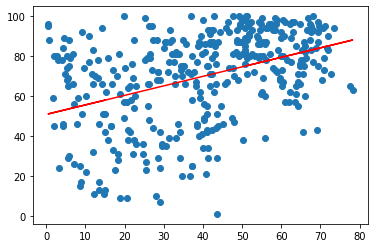

In [94]:
x=Northern["Lat"]
y=Northern["Humidity"]
(slope, intercept, rvalue, pvalue, stderr) = linregress(x, y)
regress_values = x * slope + intercept
line_eq = "y = " + str(round(slope,2)) + "x + " + str(round(intercept,2))
print(f"The r-squared is: {str(round(slope,2))}")
plt.scatter(x,y)
plt.plot(x,regress_values,"r-")

####  Southern Hemisphere - Humidity (%) vs. Latitude Linear Regression

The r-squared is: 0.68


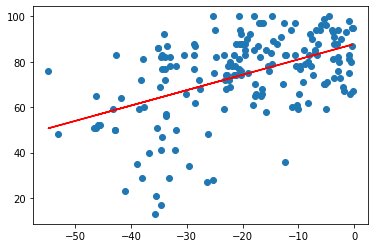

In [98]:
x=Southern["Lat"]
y=Southern["Humidity"]
(slope, intercept, rvalue, pvalue, stderr) = linregress(x, y)
regress_values = x * slope + intercept
line_eq = "y = " + str(round(slope,2)) + "x + " + str(round(intercept,2))
print(f"The r-squared is: {str(round(slope,2))}")
plt.scatter(x,y)
plt.plot(x,regress_values,"r-")

####  Northern Hemisphere - Cloudiness (%) vs. Latitude Linear Regression

The r-squared is: 0.56


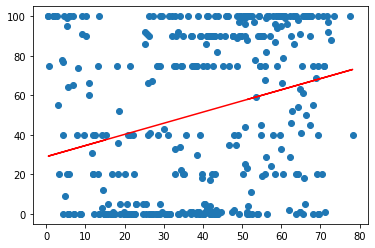

In [99]:
x=Northern["Lat"]
y=Northern["Cloudiness"]
(slope, intercept, rvalue, pvalue, stderr) = linregress(x, y)
regress_values = x * slope + intercept
line_eq = "y = " + str(round(slope,2)) + "x + " + str(round(intercept,2))
print(f"The r-squared is: {str(round(slope,2))}")
plt.scatter(x,y)
plt.plot(x,regress_values,"r-")

####  Southern Hemisphere - Cloudiness (%) vs. Latitude Linear Regression

The r-squared is: 0.54


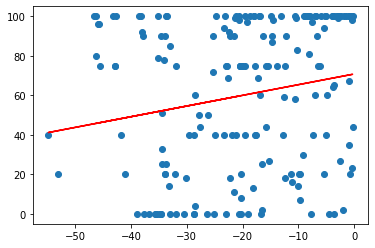

In [100]:
x=Southern["Lat"]
y=Southern["Cloudiness"]
(slope, intercept, rvalue, pvalue, stderr) = linregress(x, y)
regress_values = x * slope + intercept
line_eq = "y = " + str(round(slope,2)) + "x + " + str(round(intercept,2))
print(f"The r-squared is: {str(round(slope,2))}")
plt.scatter(x,y)
plt.plot(x,regress_values,"r-")

####  Northern Hemisphere - Wind Speed (mph) vs. Latitude Linear Regression

The r-squared is: 0.01


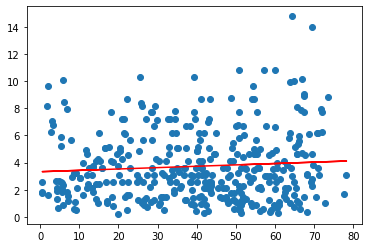

In [101]:
x=Northern["Lat"]
y=Northern["WindSpeed"]
(slope, intercept, rvalue, pvalue, stderr) = linregress(x, y)
regress_values = x * slope + intercept
line_eq = "y = " + str(round(slope,2)) + "x + " + str(round(intercept,2))
print(f"The r-squared is: {str(round(slope,2))}")
plt.scatter(x,y)
plt.plot(x,regress_values,"r-")

####  Southern Hemisphere - Wind Speed (mph) vs. Latitude Linear Regression

The r-squared is: -0.09


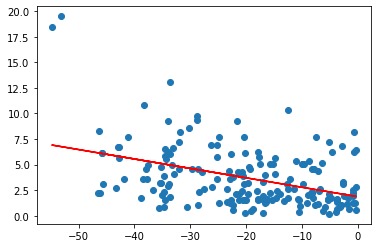

In [102]:
x=Southern["Lat"]
y=Southern["WindSpeed"]
(slope, intercept, rvalue, pvalue, stderr) = linregress(x, y)
regress_values = x * slope + intercept
line_eq = "y = " + str(round(slope,2)) + "x + " + str(round(intercept,2))
print(f"The r-squared is: {str(round(slope,2))}")
plt.scatter(x,y)
plt.plot(x,regress_values,"r-")